In [1]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import MobileNet, decode_predictions
import matplotlib.pyplot as plt
import time
import cv2

In [2]:
print(tf.__version__)

2.1.0


In [3]:
mobilenet = tf.keras.applications.mobilenet
model = mobilenet.MobileNet(weights = "imagenet")
#model = tf.keras.models.load_model('./model.pb')

17227776/17225924 [==============================] - 4s 0us/step


In [4]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [5]:
model.save('my_model.pb')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_model.pb/assets


In [7]:
img = cv2.imread('cat.jpg', -1) # -1은 왜 해주는거지?
img = cv2.resize(img, (224, 224)) # 리사이즈 까지는 알겠는데 

In [23]:
(img.reshape(-1, 224, 224, 3)).shape

(1, 224, 224, 3)

In [8]:
yhat = model.predict(img.reshape(-1, 224, 224, 3))

In [13]:
label = decode_predictions(yhat)

40960/35363 [==================================] - 0s 0us/step


In [14]:
label = label[0][0]

In [15]:
img = img[:, :, ::-1]

In [17]:
img.shape

(224, 224, 3)

In [18]:
print(label[1], label[2])

shower_curtain 0.7707821


In [22]:
yhat[0]

array([1.77124363e-07, 5.30965117e-05, 6.31717630e-05, 3.21051222e-04,
       4.29924083e-04, 1.26328096e-05, 1.23727717e-04, 2.33929391e-08,
       1.84123206e-08, 2.55590891e-07, 3.16794114e-07, 5.60318028e-07,
       1.53957546e-06, 4.90313255e-07, 8.42349891e-07, 3.43383704e-08,
       1.20732352e-07, 3.23193916e-07, 2.55675246e-07, 2.58496954e-07,
       1.39628096e-08, 8.99538790e-08, 3.27508438e-08, 1.32114607e-07,
       1.47904629e-07, 4.03883931e-08, 1.43644547e-06, 1.08591382e-06,
       2.19752465e-07, 1.74396041e-06, 4.32859828e-08, 2.52962252e-07,
       2.22266494e-09, 4.35439091e-07, 2.79233035e-07, 5.53785071e-08,
       1.47855971e-07, 7.12131794e-07, 1.51794637e-07, 3.97461584e-08,
       3.69009996e-07, 1.79379729e-08, 1.17253460e-08, 6.54686190e-08,
       6.97922474e-07, 1.31891028e-07, 2.05624201e-06, 2.95530658e-08,
       9.24928187e-08, 4.26423563e-09, 7.51426910e-07, 6.14488105e-09,
       1.53951731e-07, 2.95651716e-07, 1.44452798e-07, 2.06725667e-06,
      

테스트 시 소요 시간 : 2.1855156421661377
shower_curtain (77.08%)


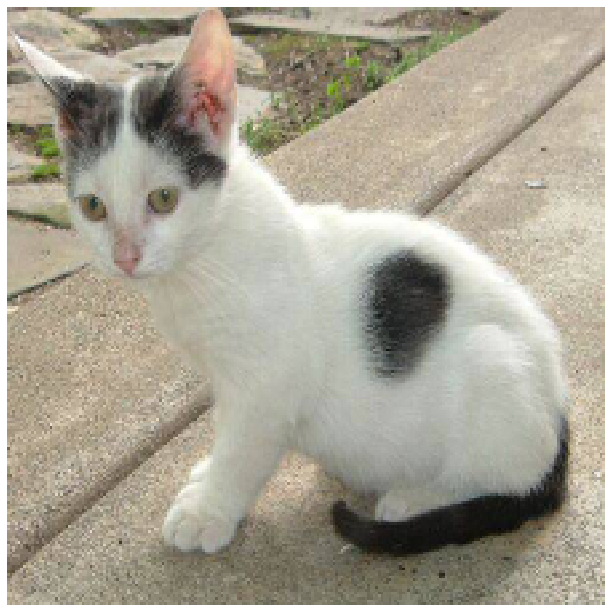

In [8]:
start = time.time() # 시간을 재기 위해 스타트
yhat = new_model2.predict(img.reshape(-1, 224, 224, 3))
time = time.time() - start
# label_key = np.argmax(yhat)
label = decode_predictions(yhat) # decode prediction은 뭐하는 애냐 
label = label[0][0] # 아마 2중구조인가보지 원래는 어떻게 생겼지?

print("테스트 시 소요 시간 : {}".format(time))
print('%s (%.2f%%)' % (label[1], label[2]*100))
img = img[:,:,::-1]
plt.figure(figsize=(11,11))
plt.imshow(img)
plt.axis("off")
plt.show()